In [17]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [18]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

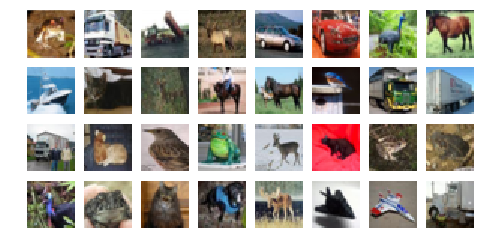

In [7]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

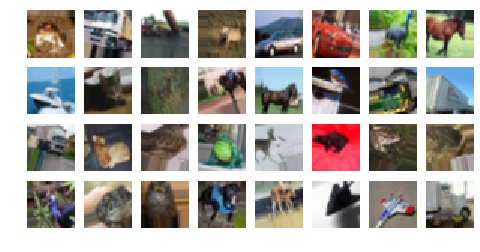

In [19]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

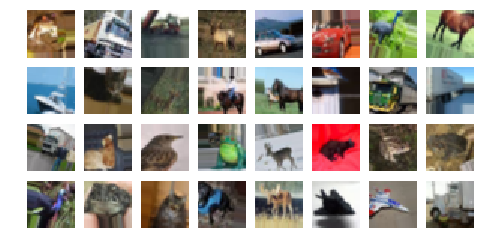

In [20]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

In [26]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [27]:
num_classes = 10
batch_size = 32

In [28]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(32, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, (3, 3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(64, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(512))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(num_classes))
model_cnn.add(Activation('softmax'))
model_cnn.summary()

model_cnn.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


In [30]:
img_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [35]:
def imglbl_generator(data_array, batch_size=32):
    x, y = data_array
    n = len(x)
    while True:
        for indexs in range(0, n, batch_size):
            images = x[indexs: indexs+batch_size]
            labels = y[indexs: indexs+batch_size]
            labels = keras.utils.to_categorical(labels, num_classes)
            for ar in range(4):                
                augmented_images = next(img_generator.flow(images, shuffle=False))
                augmented_images = augmented_images/255
                yield augmented_images, labels

In [36]:
cifar10_train_gen = imglbl_generator((x_train,y_train))
steps_per_epoch = len(x_train)//batch_size

In [ ]:
history = model_cnn.fit_generator(cifar10_train_gen,
                    steps_per_epoch=steps_per_epoch,
                    epochs=10)

Epoch 1/10
1562/1562 [==============================] - 21s 13ms/step - loss: 1.6691 - acc: 0.4012
Epoch 2/10
1562/1562 [==============================] - 21s 13ms/step - loss: 1.3972 - acc: 0.5089
Epoch 3/10
1562/1562 [==============================] - 21s 13ms/step - loss: 1.3488 - acc: 0.5302
Epoch 4/10
1562/1562 [==============================] - 21s 13ms/step - loss: 1.3668 - acc: 0.5301
Epoch 5/10
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4140 - acc: 0.5180
Epoch 6/10
1562/1562 [==============================] - 21s 14ms/step - loss: 1.4644 - acc: 0.5011
Epoch 7/10
1019/1562 [==================>...........] - ETA: 7s - loss: 1.4976 - acc: 0.4925

In [ ]:
x_test = x_test/255
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking target: expected activation_12 to have shape (10,) but got array with shape (1,)